# MNSIT Data

# 1. Data Fetching

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import cv2

from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False, parser='auto')

X, y = mnist['data'], mnist['target'].astype(np.uint8)

# 2. Exploratory Data Analysis (EDA)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
print(mnist.url)

https://www.openml.org/d/554


In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
print("Feature shape:", X.shape)
print("Target shape:",y.shape)

Feature shape: (70000, 784)
Target shape: (70000,)


In [7]:
print(X.dtype)
print(y.dtype)

int64
uint8


In [8]:
print(y[:10])

[5 0 4 1 9 2 1 3 1 4]


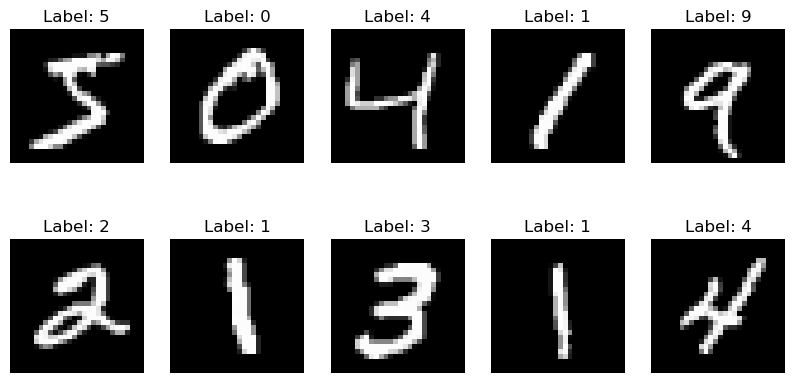

In [9]:
images = X.reshape(-1, 28, 28)

plt.figure(figsize = (10,5))

for i in range (10):
    plt.subplot(2,5, i + 1)
    plt.imshow(images[i], cmap= 'gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

In [10]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [11]:
pd.DataFrame(y).describe()

,0
count,70000.000000
mean,4.452429
std,2.890195
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


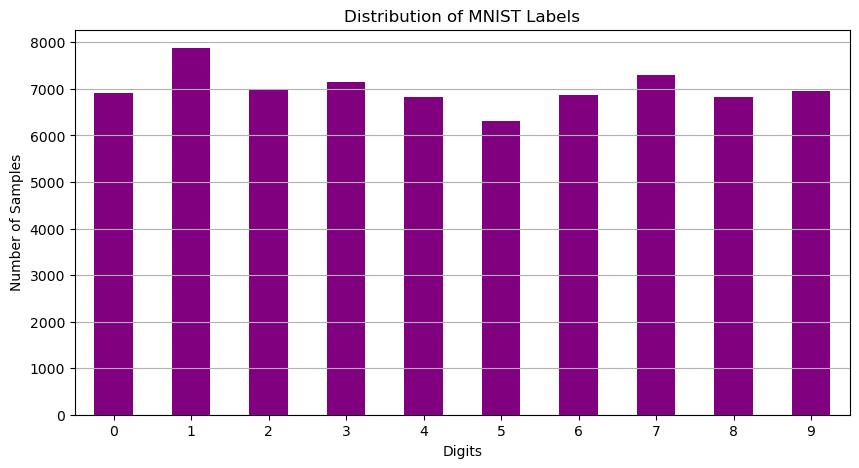

In [12]:
label_counts = pd.Series(y).value_counts().sort_index()

plt.figure(figsize=[10, 5])
label_counts.plot(kind='bar', color='purple')
plt.title('Distribution of MNIST Labels')
plt.xlabel('Digits')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [13]:
print('Missing values:',np.isnan(X).any())

Missing values: False


# 3. Model training

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 3.1. Splitting data

In [15]:
X_train = X[:50000]
y_train = y[:50000]

X_val = X[50000:60000]
y_val = y[50000:60000]

X_test = X[60000:]
y_test = y[60000:]

In [16]:
print(y_train[:10])
print(X_train.shape)
print(y_train.shape)

[5 0 4 1 9 2 1 3 1 4]
(50000, 784)
(50000,)


### 3.2. Creating pipelines

In [17]:
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state= 42, n_jobs=-1))
])

In [18]:
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state= 42, n_jobs=-1))
])

In [19]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

### 3.3. Training


The models chosen for model building are: Logistic Regression (logreg), Random Forest (rf), and Support Vector Machine (svm).

In [20]:
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=1000, n_jobs=-1,
                                    random_state=42))])

In [21]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('rf', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [22]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

# 4. Validation Evaluation

In [23]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

### 4.1. Logistic Regression

Logistic Regression: 0.9224


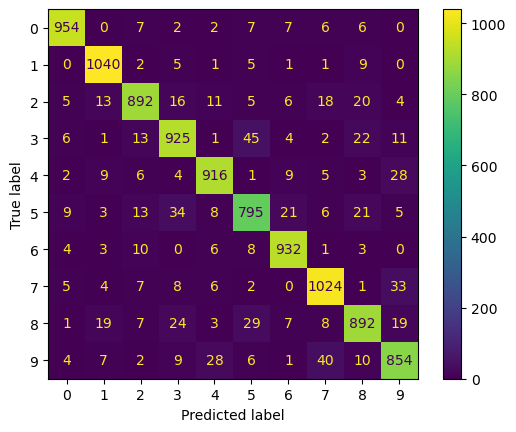

In [24]:
y_val_pred_logreg = logreg_pipeline.predict(X_val)
val_accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
print('Logistic Regression:', val_accuracy_logreg)
display_confusion_matrix(y_val, y_val_pred_logreg)

### 4.2. Random Forest

Random Forest: 0.9736


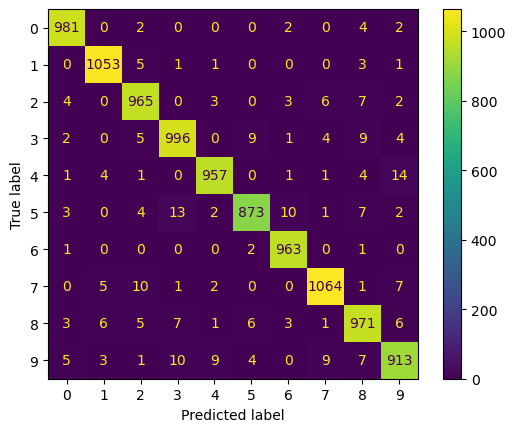

In [25]:
y_val_pred_rf= rf_pipeline.predict(X_val)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print('Random Forest:', val_accuracy_rf)
display_confusion_matrix(y_val, y_val_pred_rf)

### 4.3. Support Vector Machine

SVM: 0.9687


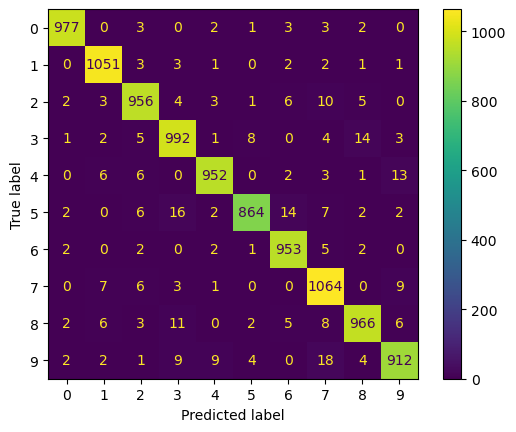

In [26]:
y_val_pred_svm = svm_pipeline.predict(X_val)
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
print('SVM:', val_accuracy_svm)
display_confusion_matrix(y_val, y_val_pred_svm)

# 5. Finetuning with GridSearchCV

Finetuning the best model based on Validation Evaluation

### 5.1. Random Forest

In [27]:
rf_gs_param = {
     'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

rf_gs = GridSearchCV(rf_pipeline, rf_gs_param, cv=3, verbose=2, n_jobs=-1)
rf_gs.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100]},
             verbose=2)

In [28]:
print("Random Forest best parameters:", rf_gs.best_params_)
print("Random Forest best score:", rf_gs.best_score_)

Random Forest best parameters: {'rf__max_depth': 30, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Random Forest best score: 0.9625599759695674


# 6. Test Evaluation

Test accuracy for Random Forest: 0.9691


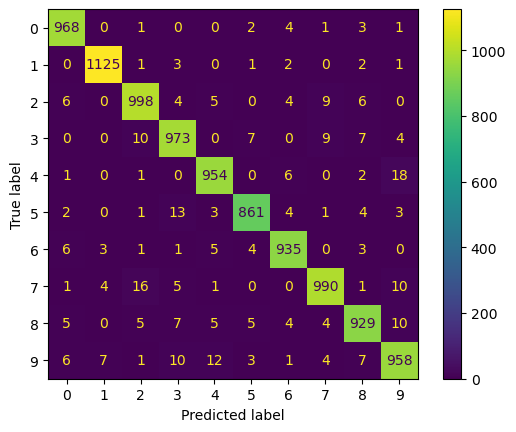

In [31]:
best_rf_model = rf_gs.best_estimator_
y_test_pred_rf = best_rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print('Test accuracy for Random Forest:', test_accuracy_rf)
display_confusion_matrix(y_test, y_test_pred_rf)

In [32]:
joblib.dump(rf_gs.best_estimator_, 'best_rf_model.pkl') #Saving model

['best_rf_model.pkl']

# 7. Digit Predictions

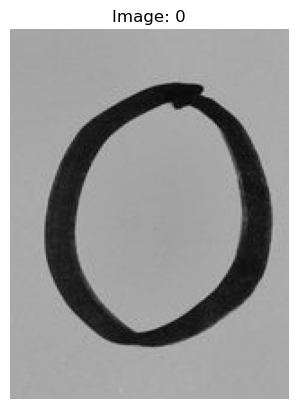

Predicted Number: 0



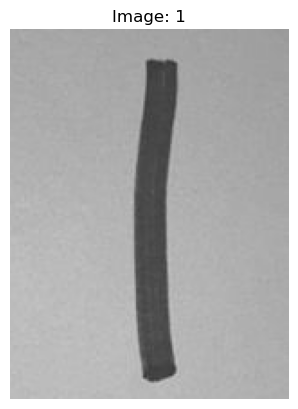

Predicted Number: 1



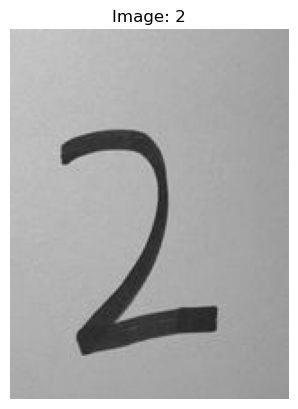

Predicted Number: 2



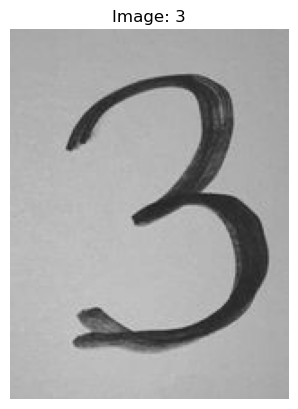

Predicted Number: 3



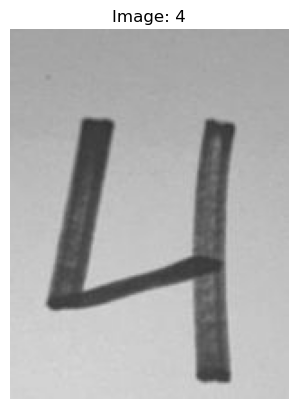

Predicted Number: 0



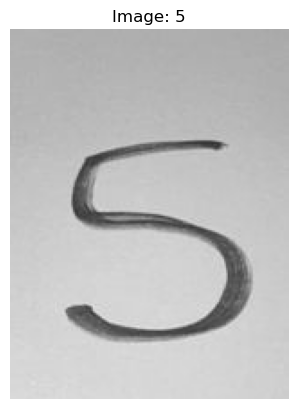

Predicted Number: 5



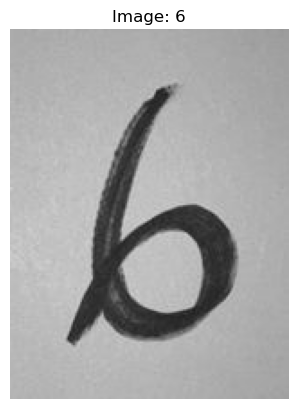

Predicted Number: 6



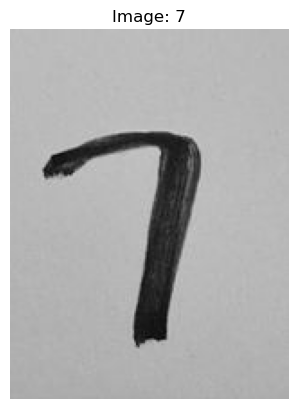

Predicted Number: 7



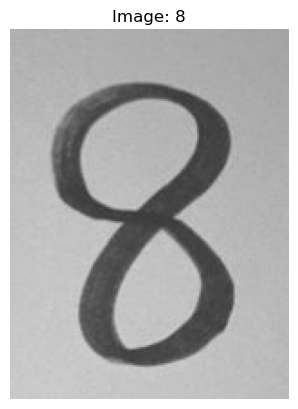

Predicted Number: 2



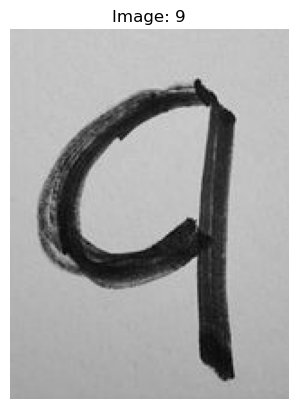

Predicted Number: 4



In [38]:
for digit in range(10):
    file_path = f"C:\\numbers\\{digit}.jpg"
    orig_img = cv2.imread(file_path)
    img_gray = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (28, 28))
    img_norm = img_resized / 255.0
    img_inverted = 255.0 - img_norm * 255.0
    threshold_value = np.average(img_inverted)
    img_inverted[img_inverted <= threshold_value] = 0
    img_flat = img_inverted.ravel().reshape(1, -1)

    plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB))
    plt.title(f'Image: {digit}')
    plt.axis('off')
    plt.show()

    prediction = best_rf_model.predict(img_flat)
    print(f'Predicted Number: {prediction[0]}\n')
